### Task 1  - Region wise country name

In [2]:
import mysql.connector as sql
import pandas as pd

In [3]:
db = sql.connect(host = 'localhost',user='root',password = 'Ramalingam123')

In [4]:
mycursor = db.cursor()

In [5]:
mycursor . execute ("use hr")

In [6]:
mycursor.execute("select country_name,region_name from countries inner join regions using(region_id)" )

In [7]:
data = mycursor.fetchall()

In [8]:
data

[('Belgium', 'Europe'),
 ('Switzerland', 'Europe'),
 ('Germany', 'Europe'),
 ('Denmark', 'Europe'),
 ('France', 'Europe'),
 ('Italy', 'Europe'),
 ('Netherlands', 'Europe'),
 ('United Kingdom', 'Europe'),
 ('Argentina', 'Americas'),
 ('Brazil', 'Americas'),
 ('Canada', 'Americas'),
 ('Mexico', 'Americas'),
 ('United States of America', 'Americas'),
 ('Australia', 'Asia'),
 ('China', 'Asia'),
 ('HongKong', 'Asia'),
 ('India', 'Asia'),
 ('Japan', 'Asia'),
 ('Singapore', 'Asia'),
 ('Egypt', 'Middle East and Africa'),
 ('Israel', 'Middle East and Africa'),
 ('Kuwait', 'Middle East and Africa'),
 ('Nigeria', 'Middle East and Africa'),
 ('Zambia', 'Middle East and Africa'),
 ('Zimbabwe', 'Middle East and Africa')]

Interpretation  -  Here i have displayed the region wise country name and region name by joining two tables of countries and region

### Task 2 - Country wise employee count

In [9]:
mycursor.execute("""select country_name,count(employee_id) from employees 
join departments using(department_id) 
join locations using (location_id)
join countries using (country_id)
group by country_name """)


In [10]:
data1=  mycursor.fetchall()
data1

[('United States of America', 68),
 ('Canada', 2),
 ('United Kingdom', 35),
 ('Germany', 1)]

In [11]:
df = pd.DataFrame(data1)
df

,0,1
0,United States of America,68
1,Canada,2
2,United Kingdom,35
3,Germany,1


In [23]:
from sqlalchemy import create_engine

In [26]:
!pip install pymysql

                                              0.0/44.8 kB ? eta -:--:--
     ---------------------------------------- 44.8/44.8 kB ? eta 0:00:00


In [27]:
import pandas as pd

# Create the engine
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='hr', user='root', pw='Ramalingam123'))

df.to_sql('country_wise_employee_count', engine, index=False, if_exists='replace')


4

In [14]:
import mysql.connector as sql
db = sql.connect(host='localhost', user='root',password='Ramalingam123',database='hr')
mycursor = db.cursor()

conclusion - Created a separate table for the data1 contains of country wise employees

### Task 3   - country wise and city wise employee count

In [15]:
mycursor.execute ("""select country_name ,city,count(employee_id) as count_of_employees
from employees 
join departments using(department_id) 
join locations using(location_id)
join countries using(country_id)
group by country_name,city 
order by country_name,city;""")

In [16]:
data2 = mycursor.fetchall()
data2

[('Canada', 'Toronto', 2),
 ('Germany', 'Munich', 1),
 ('United Kingdom', 'London', 1),
 ('United Kingdom', 'Oxford', 34),
 ('United States of America', 'Seattle', 18),
 ('United States of America', 'South San Francisco', 45),
 ('United States of America', 'Southlake', 5)]

In [17]:
a = pd.DataFrame(data2)

In [18]:
a

,0,1,2
0,Canada,Toronto,2
1,Germany,Munich,1
2,United Kingdom,London,1
3,United Kingdom,Oxford,34
4,United States of America,Seattle,18
5,United States of America,South San Francisco,45
6,United States of America,Southlake,5


In [19]:
import matplotlib.pyplot as plt

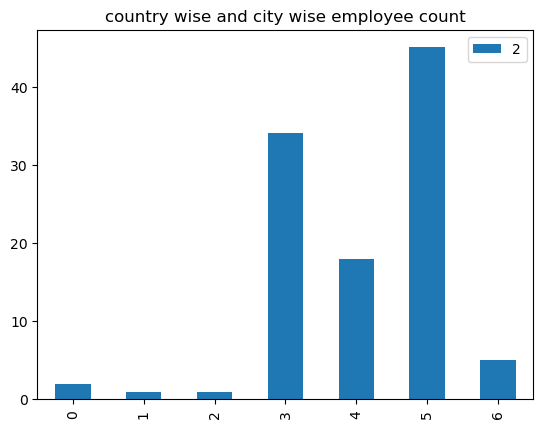

In [20]:
a.plot(kind="bar")
plt.title("country wise and city wise employee count")

plt.show()

In [30]:
# Create the engine
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='hr', user='root', pw='Ramalingam123'))

df.to_sql('country_wise and city_wise employee_count', engine, index=False, if_exists='replace')

4

Conclusion - The count of employees by city wise and country wise are seperated and stored as csv file ,push it to the database of sql and create a bar chart .